YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

=== 단기 수익률 기준 이정희 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
써니전자       -0.082044
안랩         -0.094451
솔고바이오      -0.106346
월비스        -0.278017
케이씨피드      -0.382278
Name: KODEX200, dtype: float64


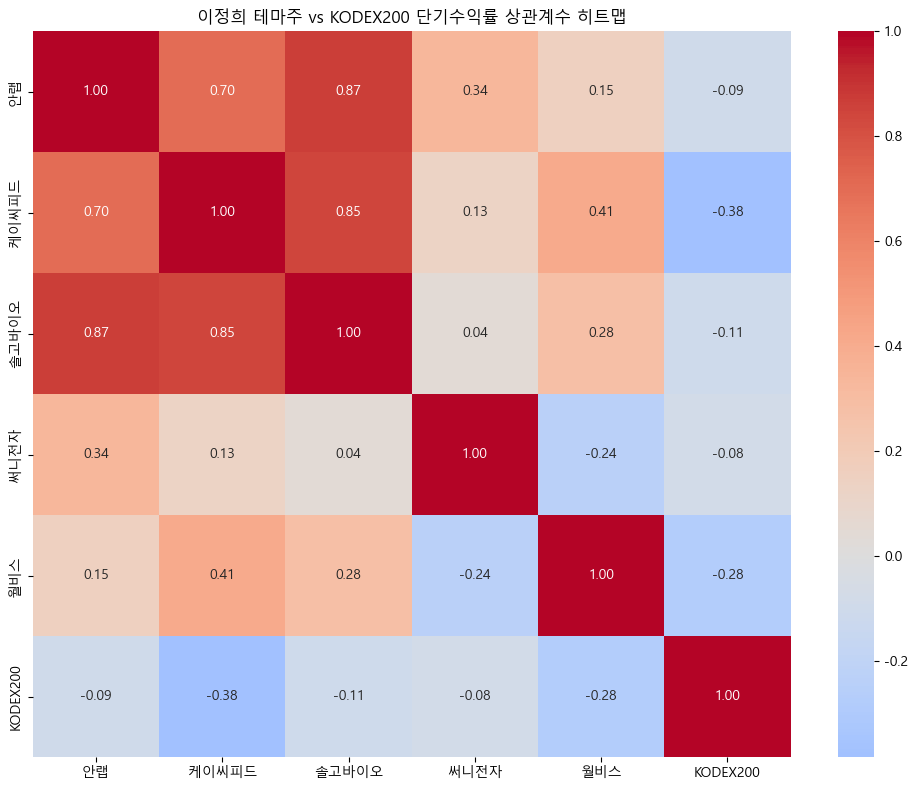

In [1]:
import yfinance  as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


label_dict = {
    'thema1': '안랩',
    'thema2': '케이씨피드',
    'thema3': '솔고바이오',
    'thema4': '써니전자',
    'thema5': '월비스',
}

# 날짜 설정
start_date = '2012-10-11' #경선확정일 - 10
end_date = '2012-10-31' #경선확정일 + 10

thema1 = yf.download('053800.KQ', start=start_date, end=end_date)  #안랩
thema2 = yf.download('025880.KQ', start=start_date, end=end_date)  #케이씨피드
thema3 = yf.download('043100.KQ', start=start_date, end=end_date)  #솔고바이오
thema4 = yf.download('004770.KQ', start=start_date, end=end_date)  #써니전자
thema5 = yf.download('008600.KQ', start=start_date, end=end_date)  #월비스

# 테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.
# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능

thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = yf.download('069500.KS', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 이정희 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("이정희 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
